In [171]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [172]:
#sink_gas_data = pickle.load(open('./pickles/L5_8M_sink_data.pickle','rb'))
sink_gas_data = pickle.load(open('./pickles/L5_8M_sink_and_star_data.pickle', 'rb'))

In [173]:
def calculate_mass_thresh(sink_rad, dens_thresh):
    vol = (4./3) * np.pi * sink_rad**3
    mass_thresh = dens_thresh * vol
    mass_thresh_solar = mass_thresh * 5.0279e-34
    return mass_thresh_solar

mass_thresh = calculate_mass_thresh(2.636687e17, 6.772331e-20)
print mass_thresh

vol = 65 * (2.636687e17 / 2.5)**3
mass_cells = 6.772331e-20 * vol * 5.0279e-34
print mass_cells/mass_thresh

2.6145030378
0.993126844893


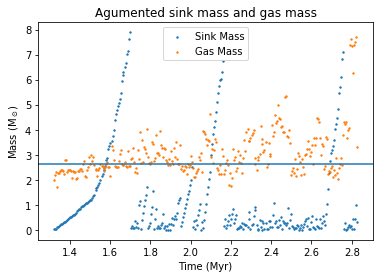

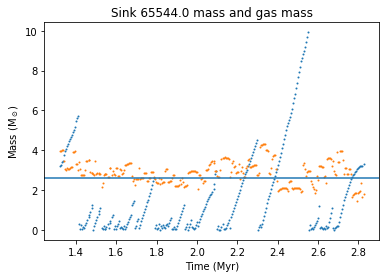

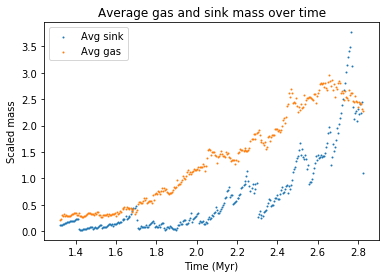

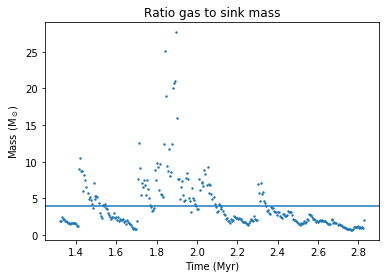

In [174]:
#print sink_gas_data['name']
#print sink_gas_data["sink_mass"].mean()


#sink_name = '65544.0'
sink_name = '65541.0'
plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)
#print sink_gas_data[sink_array]["sink_accr"][0]
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34, 
            label='Sink Mass', 
            s=2)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
            label='Gas Mass', 
            s=2)
plt.axhline(y=mass_thresh)
plt.title('Agumented sink mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#plt.figure()
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, sink_gas_data[sink_array]["sink_accr"][0],s=1)
#plt.show()

plt.figure()
sink_name = '65544.0'
sink_array = np.where(sink_gas_data['name'] == sink_name)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34,
            s=1)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
            s=1)
plt.axhline(y=mass_thresh)
plt.title('Sink 65544.0 mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#ratio_gas_sink_mass = sink_gas_data["sink_mass"].mean()

plt.figure()
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_data["sink_mass"].mean()*5.0279e-34,
            label='Avg sink',s=1)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
plt.title('Average gas and sink mass over time')
plt.xlabel('Time (Myr)')
plt.ylabel('Scaled mass')
plt.legend()
plt.show()

ratio_gas_to_sink = sink_gas_data["gas_mass"].mean()/sink_gas_data["sink_mass"].mean()
avg_ratio = ratio_gas_to_sink.mean()
plt.figure()
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            ratio_gas_to_sink,
            s=2)
plt.axhline(y=avg_ratio)
plt.title('Ratio gas to sink mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

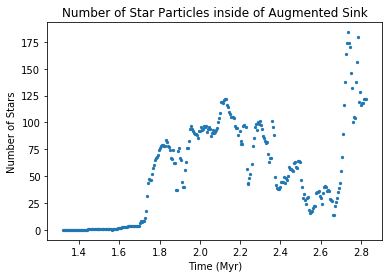

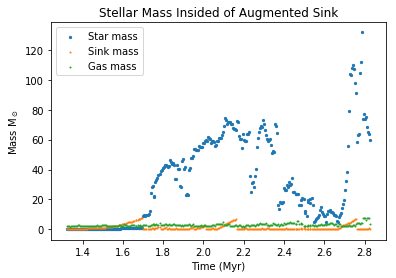

max stellar number density in sink:  70949.8935796 per pc^3
max stellar mass density in sink:  50808.5414371 Msun/pc^3
max total mass density in sink:  74013.3718349


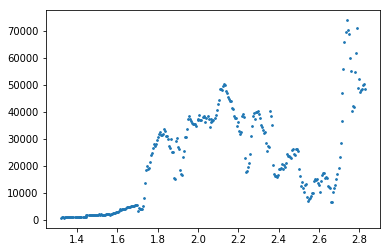

In [206]:
sink_name = '65541.0'
plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)

plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_data[sink_array]["stars_in_sink"][0],
            s=5
            )
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
plt.title('Number of Star Particles inside of Augmented Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Number of Stars')
plt.legend()
plt.show()


plt.figure()

plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_data[sink_array]["star_mass_sink"][0]*5.0279e-34,
            label='Star mass',
            s=5
            )
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34,
            label='Sink mass',
            s=1)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
            label='Gas mass',
            s=1)
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
#plt.xlim(1.3, 2.0)
#plt.ylim(-5, 40)
plt.title('Stellar Mass Insided of Augmented Sink')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass M$_\odot$')
plt.legend()
plt.show()

#calculate stars/cubic parsec
sink_vol = (4./3) * np.pi * 0.08523**3
stars_in_aug_sink = sink_gas_data[sink_array]["stars_in_sink"][0]
stellar_density = stars_in_aug_sink/sink_vol

print 'max stellar number density in sink: ', stellar_density.max(), "per pc^3"

gas_mass_in_aug_sink = sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34
star_mass_in_aug_sink = sink_gas_data[sink_array]["star_mass_sink"][0]*5.0279e-34
aug_sink_mass = sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34
tot_mass_in_sink = gas_mass_in_aug_sink + stars_in_aug_sink + aug_sink_mass

sink_mass_density = tot_mass_in_sink/sink_vol

print 'max stellar mass density in sink: ', star_mass_in_aug_sink.max()/sink_vol, 'Msun/pc^3'
print 'max total mass density in sink: ', sink_mass_density.max()

plt.figure()
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, sink_mass_density, s=3)
plt.show()

In [108]:
# plot average sink mass and average gas mass over time
mass_sink = 0.0
counter = 1
sink_avg_list = []
for i in np.arange(1,len(sink_gas_data['name'])):
    
    sink_mass_inst = sink_gas_data["sink_mass"][i][0][i]
    print sink_mass_inst
    if sink_mass_inst > 1.0:
        
        mass_sink += sink_mass_inst
        counter += 1
    sink_avg = mass_sink / counter
    sink_avg_list.append(sink_avg)
    mass_sink = 0.0
    counter = 1
    for j in np.arange(0, len(sink_gas_data["sink_mass"][i][0])):
        #mass_sink += sink_gas_data["sink_mass"][i][0][j]
        #sink_avg = mass_sink.mean()
        #print sink_gas_data["sink_mass"][i]
    #sink_avg_list.append(sink_avg)
        
    #if sink_gas_data["particle_mass"][i]
#print sink_gas_data["sink_mass"][1:-1]
#print sink_gas_data["time"]

print sink_avg_list

7.62064465767e+31
6.73053685386e+33
1.05992893692e+32
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[3.8103223288361146e+31, 3.3652684269301169e+33, 5.2996446846030996e+31, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [207]:
#print sink_gas_data["sink_mass"][1][0:1]
#print sink_gas_data["sink_mass"]
#plt.plot(sink_gas_data[sink_array]["time"][0]*3.17098e-14, sink_avg_list)
#sink_gas_data['star_mass_sink']
#print sink_gas_data['stars_in_sink']
sink_gas_data

array([[ (u'name', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [211]:
radius = (2.5e17, "cm")
print radius
radius = (2*2.5e17, "cm")
print radius

(2.5e+17, 'cm')
(5e+17, 'cm')
